In [10]:
import numpy as np
list1 = [ 255,0,0, 0,255,0, 0,0, 255]
arr1 = np.array( list1 )
arr1.reshape( 3,3 ).reshape( 9)

list2 = [ 4,5,7,8,4,3,2,1]
arr2 = np.array(list2)
arr2.reshape( -1,2,2)/255 #MinMaxScaling



array([[[0.01568627, 0.01960784],
        [0.02745098, 0.03137255]],

       [[0.01568627, 0.01176471],
        [0.00784314, 0.00392157]]])

#1. 이미지 전처리

0. Caltech101 이미지 데이터: https://www.vision.caltech.edu/Image_Datasets/Caltech101/Caltech101.html

1. content의 caltech의 zip파일을 압축을 해제
- !unzip 파일이름.zip
2. 각 폴더에 있는 이미지들을 읽으셔서 크기를 50,50으로 resize하셔서, 모두 png 파일로 저장해주세요
 - 파일이름은 폴더이름_resized_일련번호.png

In [1]:
import os
if not os.path.exists("caltech"):
  os.mkdir("caltech")
os.chdir("/content/caltech")
if not os.path.exists("result"):
  os.makedirs("result")

In [2]:
!unzip 101_ObjectCategories.zip

Archive:  101_ObjectCategories.zip
  inflating: flamingo/image_0001.jpg  
  inflating: flamingo/image_0002.jpg  
  inflating: flamingo/image_0003.jpg  
  inflating: flamingo/image_0004.jpg  
  inflating: flamingo/image_0005.jpg  
  inflating: flamingo/image_0006.jpg  
  inflating: flamingo/image_0007.jpg  
  inflating: flamingo/image_0008.jpg  
  inflating: flamingo/image_0009.jpg  
  inflating: flamingo/image_0010.jpg  
  inflating: flamingo/image_0011.jpg  
  inflating: flamingo/image_0012.jpg  
  inflating: flamingo/image_0013.jpg  
  inflating: flamingo/image_0014.jpg  
  inflating: flamingo/image_0015.jpg  
  inflating: flamingo/image_0016.jpg  
  inflating: flamingo/image_0017.jpg  
  inflating: flamingo/image_0018.jpg  
  inflating: flamingo/image_0019.jpg  
  inflating: flamingo/image_0020.jpg  
  inflating: flamingo/image_0021.jpg  
  inflating: flamingo/image_0022.jpg  
  inflating: flamingo/image_0023.jpg  
  inflating: flamingo/image_0024.jpg  
  inflating: flamingo/image_0

In [3]:
categories = [ i for i in os.listdir() if ( not (i.endswith(".zip")) ) & (i != 'result') & (not ( i.endswith(".ipynb_checkpoints")))]
categories

['chair', 'butterfly', 'flamingo', 'elephant', 'camera']

In [4]:
#/content/caltech/result 폴더에 저장하기
from PIL import Image
for i in categories:
  files = os.listdir( i )
  q=1
  for j in files:
    img = Image.open(i+"/"+j)
    img.resize( (50, 50) )
    img.save("result/"+i+"_resized_"+str(q)+".jpg")
    q=q+1

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

os.chdir("/content/caltech")
#대상 카테고리
nb_classes = len(categories)

#image size
image_w=50
image_h=50
pixels = image_w * image_h * 3

#read
X=[]
Y=[]
categories

['chair', 'butterfly', 'flamingo', 'elephant', 'camera']

In [ ]:
os.chdir(  "/content/caltech/result")
files = os.listdir()
for i in files:
  img = Image.open(i)
  print(np.array(img).shape)

In [ ]:
import glob

os.chdir("/content")

for idx, cat in enumerate( categories):

  #label
  label=[0 for i in range(nb_classes)]
  label[idx]=1

  #image
  image_dir="caltech/"+cat
  files = glob.glob(image_dir+"/*.jpg") #현재 또는 주어진 디렉토리의 특정 확장자의 파일 선택
  print(image_dir)

  for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data=np.array(img)
    X.append(data)
    Y.append(label)
    if i%10 ==0:
      print(i, "\n", data)

X=np.array(X)
Y=np.array(Y)

print(X.shape)

#partition
X_train, X_test, y_train, y_test = train_test_split( X,Y)

In [ ]:
X_train_new = X_train.reshape(-1, 750)
X_test_new = X_test.reshape(-1, 750)

In [ ]:
#Machine_defect에서 Defect Identification System의
# Machinery Defect Image 폴더에서 두 폴더 선택해서 데이터셋 만드세요
# 이미지-> X 라는 이름의 array, y에는 각 이미지가 속한 폴더 들어가도록 만드세요
# 1시10분까지 해보세요~~~

In [16]:
os.getcwd()
os.chdir("/content")

In [ ]:
!unzip Defect.zip

In [18]:
files1 = os.listdir("Corrosion")
files2 = os.listdir("Overheating")

In [32]:
X = []
y = []
for i in files1:
  img = Image.open("Corrosion/"+i)
  img = img.convert("RGB")
  img = img.resize((50,50))
  X.append( np.array(img) )
  y.append(0)

for i in files2:
  img = Image.open("Overheating/"+i)
  img = img.convert("RGB")
  img = img.resize((50,50))
  X.append( np.array(img) )
  y.append(1)

X_new = np.array(X).reshape( 14, 7500).shape
y_new = np.array(y)


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

- opencv 활용

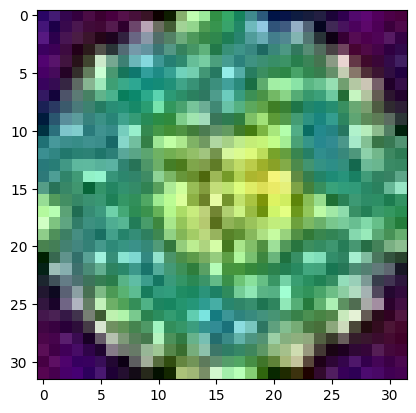

In [ ]:
import cv2
import numpy as np

# OpenCV를 사용해서 이미지 읽어 들이기
im = cv2.imread('641447.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (32, 32))
plt.imshow(im) # 이미지 출력하기

In [ ]:
im.shape

(32, 32, 3)

- wafer 이미지 처리

In [33]:
!unzip Dataset.zip

Archive:  Dataset.zip
   creating: Dataset/
   creating: Dataset/Center/
  inflating: Dataset/Center/641447.jpg  
  inflating: Dataset/Center/642989.jpg  
  inflating: Dataset/Center/646177.jpg  
  inflating: Dataset/Center/648236.jpg  
  inflating: Dataset/Center/651816.jpg  
  inflating: Dataset/Center/655870.jpg  
  inflating: Dataset/Center/659673.jpg  
  inflating: Dataset/Center/678673.jpg  
  inflating: Dataset/Center/679609.jpg  
  inflating: Dataset/Center/680688.jpg  
  inflating: Dataset/Center/682743.jpg  
  inflating: Dataset/Center/683806.jpg  
  inflating: Dataset/Center/686597.jpg  
  inflating: Dataset/Center/687416.jpg  
  inflating: Dataset/Center/691371.jpg  
  inflating: Dataset/Center/692645.jpg  
  inflating: Dataset/Center/696055.jpg  
  inflating: Dataset/Center/712477.jpg  
  inflating: Dataset/Center/713551.jpg  
  inflating: Dataset/Center/720828.jpg  
  inflating: Dataset/Center/723088.jpg  
  inflating: Dataset/Center/724684.jpg  
  inflating: Dataset/Cent

In [45]:
import numpy as np
from PIL import Image
import os, glob, random

max_photo = 150
photo_size=24

In [46]:
import os
import glob
import random
dirs = os.listdir("Dataset")
dirs

['Scratch',
 'near full',
 'Edge Ring',
 'Donut',
 'Center',
 'Local',
 'Edge Local',
 'none',
 'random']

In [47]:
def img_read(dir):
  files = glob.glob( "Dataset/"+dir+"/*.jpg")
  #random.shuffle(files)
  num=0
  tmp1 = []
  tmp2 = []
  print(len(files), dir, num)
  for f in files:
    print(f)
    if num >= max_photo: break
    num +=1
    img = Image.open(f)
    img= img.convert("RGB")
    img= img.resize((photo_size, photo_size))
    img= np.asarray(img)
    tmp1.append(img)
    tmp2.append(dir)	#label을 0으로 지정
  return tmp1, tmp2

In [ ]:
x=[]
y=[]

for dir in dirs:
  print(dir)
  x1, y1 = img_read(dir)
  x.append(x1)
  y.append(y1)

In [49]:
x_final = [item for sublist in x for item in sublist]
y_final = [item for sublist in y for item in sublist]

In [54]:
# x_final, y_final을 이용하셔서 분류모형을 만들어보세요
# 24,24 resize
# 파티셔닝
# y: ohe
# 테스트에 대한 성능 평가
# 1:40,,
X_arr = np.array(x_final).reshape(-1, 24*24*3)
y_arr = np.array(y_final)
import pandas as pd
y2 = pd.get_dummies(y_arr).astype(int)

In [61]:
from sklearn.feature_selection import *
selector = SelectKBest( f_classif, k=800)
selector.fit( X_arr, y_arr)
X_arr_selected = selector.transform( X_arr )

In [ ]:
!pip install xgboost

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_arr_selected, y2)

#RF, xgboost 두 모형 비교, 각 모형별로는 gridsearchcv
#selectkbest는 제외
#best 모형에 대해 테스트에 대해 성능평가
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
models = [ XGBClassifier(), RandomForestClassifier()]

grid = {"n_estimators":[80,100,120], "max_depth":[3,5,7]}

def search( grid, model, cv):
  tmp = GridSearchCV(model, param_grid=grid, scoring="accuracy", cv=cv)
  tmp.fit(X_train, y_train)
  print(tmp.best_params_)
  print(tmp.best_score_)
  return tmp

for i in models:
  search( grid, i, 3)


{'max_depth': 7, 'n_estimators': 100}
0.49701737135365454
{'max_depth': 7, 'n_estimators': 100}
0.2766437233693871


In [64]:
from sklearn.metrics import classification_report
pred = rf.predict( X_test)
print( classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.09      0.16        23
           1       0.92      0.67      0.77        36
           2       1.00      0.13      0.23        23
           3       1.00      0.32      0.48        25
           4       1.00      0.17      0.30        23
           5       0.00      0.00      0.00        24
           6       0.92      1.00      0.96        22
           7       1.00      0.32      0.48        25
           8       1.00      0.56      0.72        25

   micro avg       0.96      0.38      0.54       226
   macro avg       0.87      0.36      0.46       226
weighted avg       0.87      0.38      0.47       226
 samples avg       0.38      0.38      0.38       226



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#이미지 출력
import matplotlib.pyplot as plt
idx = 100
plt.figure(figsize=(10,10))
for i in range(9):
 plt.subplot(5,5,i+1)
 plt.title(y_final[i*idx])
 plt.imshow(x_final[i*idx])
plt.show()

In [69]:
np.argmax( pred, axis=1)    #OHE->원래대로
np.argmax( y_test, axis=1)

array([5, 3, 3, 6, 8, 7, 6, 0, 1, 2, 5, 1, 1, 7, 4, 6, 7, 3, 6, 1, 2, 0,
       3, 8, 4, 6, 4, 0, 8, 1, 4, 8, 7, 2, 1, 2, 3, 2, 8, 2, 4, 0, 4, 7,
       4, 4, 3, 2, 2, 5, 0, 2, 8, 6, 4, 7, 4, 3, 1, 0, 3, 2, 6, 2, 1, 8,
       0, 4, 5, 7, 2, 0, 8, 2, 8, 7, 2, 8, 4, 5, 8, 7, 0, 2, 4, 6, 5, 2,
       2, 6, 6, 1, 6, 1, 2, 6, 2, 0, 2, 4, 4, 0, 1, 7, 3, 8, 0, 5, 6, 1,
       5, 4, 7, 4, 2, 3, 4, 0, 1, 0, 8, 5, 8, 1, 5, 1, 6, 4, 5, 0, 3, 1,
       5, 0, 0, 3, 1, 8, 7, 6, 2, 5, 7, 3, 7, 1, 3, 6, 7, 8, 8, 2, 6, 2,
       4, 4, 1, 1, 2, 0, 3, 6, 5, 2, 1, 5, 2, 1, 0, 8, 2, 7, 4, 8, 4, 3,
       5, 3, 5, 2, 2, 3, 7, 6, 7, 7, 7, 4, 0, 7, 1, 1, 0, 0, 3, 2, 5, 6,
       5, 4, 5, 8, 2, 5, 7, 5, 6, 3, 5, 2, 7, 5, 1, 1, 2, 6, 4, 7, 0, 3,
       6, 7, 2, 2, 2, 3])

#2. 분류 모형 적용

In [ ]:
import pandas as pd
X_arr = np.array(x_final).reshape(-1, 32*32*3)
y_arr = np.array(y_final)

X_df = pd.DataFrame(X_arr)
y_df = pd.DataFrame(y_arr)

y_df_ohe = pd.get_dummies(y_df, drop_first=False)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_df, y_df_ohe,
                                                    test_size=0.2, random_state=123, stratify=y_df_ohe)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import classification_report
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60        20
           1       0.77      0.48      0.59        21
           2       0.75      0.57      0.65        21
           3       0.79      0.75      0.77        20
           4       0.38      0.60      0.46        20
           5       0.53      0.50      0.51        20
           6       0.86      0.95      0.90        19
           7       0.85      0.85      0.85        20
           8       0.62      0.65      0.63        20

   micro avg       0.66      0.66      0.66       181
   macro avg       0.68      0.66      0.66       181
weighted avg       0.68      0.66      0.66       181
 samples avg       0.66      0.66      0.66       181



In [ ]:
np.argmax( pred, axis=1)

array([6, 0, 1, 4, 6, 5, 8, 0, 8, 1, 7, 5, 7, 4, 4, 4, 4, 7, 0, 2, 6, 2,
       4, 6, 1, 1, 3, 4, 7, 4, 2, 3, 3, 0, 6, 3, 3, 0, 6, 5, 4, 4, 6, 5,
       8, 2, 3, 2, 1, 2, 7, 3, 4, 1, 5, 5, 0, 6, 0, 8, 4, 4, 7, 8, 8, 3,
       8, 0, 7, 7, 0, 6, 0, 0, 4, 8, 7, 2, 7, 6, 6, 4, 5, 3, 8, 7, 3, 0,
       1, 8, 4, 0, 8, 8, 8, 5, 4, 5, 0, 2, 4, 5, 2, 6, 8, 7, 2, 8, 5, 1,
       4, 6, 5, 8, 6, 1, 8, 0, 2, 0, 3, 4, 4, 7, 5, 4, 4, 7, 5, 7, 5, 6,
       1, 4, 7, 3, 4, 7, 1, 5, 8, 1, 4, 8, 2, 6, 0, 3, 8, 4, 0, 3, 3, 3,
       4, 4, 7, 0, 6, 4, 4, 6, 7, 3, 3, 1, 2, 5, 2, 6, 0, 6, 4, 2, 5, 3,
       8, 7, 2, 5, 6])

- 사진 촬영

In [70]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from google.colab import files
import cv2
import numpy as np
import PIL.Image
import io

In [71]:
# 브라우저에서 웹캠으로 사진 찍기
def take_photo(filename='picture.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = '촬영';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // 클릭할 때 사진 캡처
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            div.remove();

            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = io.BytesIO(base64.b64decode(data.split(',')[1]))

    # 저장
    image = PIL.Image.open(binary)
    image.save(filename)
    print(f"{filename} 저장 완료!")

    return filename


In [73]:
# 필요한 모듈 import
import base64

# 사진 찍기 실행
take_photo()

<IPython.core.display.Javascript object>

picture.jpg 저장 완료!


'picture.jpg'

In [ ]:
import cv2
import numpy as np

# OpenCV를 사용해서 이미지 읽어 들이기
im = cv2.imread('picture.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)  #test-car.jpg 업로드 필요
im = cv2.resize(im, (32, 32))
plt.imshow(im) # 이미지 출력하기
plt.show()

In [ ]:
res = model.predict( im.reshape(-1, 32,32,3) )
print(res.max()*100 ,"%의 확률로 ", dirs[res.argmax()], "으로 분류")

#3. CNN 기법

In [74]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
num_classes = 9
in_shape = (32, 32, 3)
epochs = 10

# 데이터를 정규화하기 (flatten을 하지 않음)
X_train_4d = X_train.values.reshape(-1, 32,32,3).astype('float32') / 255
X_test_4d = X_test.values.reshape(-1, 32,32,3).astype('float32') / 255

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

# 모델 정의하기
def model_train(X_train_4d, y_train, num_classes, in_shape, epochs):
  model = Sequential()
  model.add(Conv2D(64, (3, 3), padding='same', input_shape=in_shape))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.05))

  model.add(Conv2D(128, (3,3), padding='same', name="conv"))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.05))

  model.add(Flatten())
  model.add(Dense(64, activation="relu"))
  model.add(Dense(32, activation="relu"))
  model.add(Dense(num_classes, activation="softmax"))

  #실행 전 GPU 설정
  # 모델 컴파일하기
  model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

  # 학습 실행하기
  hist = model.fit(X_train_4d, y_train,
    batch_size=32, epochs=epochs,
    verbose=1,
    validation_split=0.1)

  return model, hist

# 모델 평가하기
def evaluate(model, X_test_4d, y_test):
  pred = model.predict(X_test_4d)
  score = model.evaluate(X_test_4d, y_test, verbose=1)
  print('정답률=', score[1], 'loss=', score[0])
  return pred

In [ ]:
model, history = model_train(X_train_4d, y_train, num_classes, in_shape, epochs)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - accuracy: 0.2202 - loss: 2.0661 - val_accuracy: 0.2329 - val_loss: 1.8678
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 231ms/step - accuracy: 0.4534 - loss: 1.4683 - val_accuracy: 0.4932 - val_loss: 1.5616
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accuracy: 0.5850 - loss: 1.1561 - val_accuracy: 0.5616 - val_loss: 1.2502
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 222ms/step - accuracy: 0.6725 - loss: 0.9498 - val_accuracy: 0.6164 - val_loss: 1.2373
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.6983 - loss: 0.8563 - val_accuracy: 0.6849 - val_loss: 1.0178
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.7552 - loss: 0.7040 - val_accuracy: 0.6301 - val_loss: 1.1595
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.7910 - loss: 0.6741 - val_accuracy: 0.7123 - val_loss: 0.8130
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.7905 - loss: 0.5944 - val_accuracy: 0.7123 - val_

In [ ]:
pred = evaluate(model, X_test_4d, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7760 - loss: 0.6923
정답률= 0.7790055274963379 loss= 0.7139888405799866


In [ ]:
pred = model.predict( X_test_4d)
classification_report( y_test, pred)
